# Data Analysis Of Spending Pattens

In [222]:
import pandas as pd
import matplotlib.pyplot as plt 
bank = pd.read_csv (r'C:\KarlsCode\Karls files\Karl_bank.csv')
pd.set_option('display.max_rows', 500)
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

## Data Inspection

In [223]:
print(bank.head())

        Date  TransactionAmount Currency  \
0  27-May-22            -152.87      GBP   
1  27-May-22             -30.00      GBP   
2  27-May-22             -20.00      GBP   
3  27-May-22             202.87      GBP   
4  25-May-22             -20.00      GBP   

                                  TransactionType  
0          Transfer MOB, Karl Martin Roe, Revolut  
1  Transfer MOB, Child Mantance, child iva pertol  
2                          Transfer MOB, Mum, mum  
3                    Giro NHS PROF 75219 30293400  
4          Transfer MOB, Karl Martin Roe, Revolut  


In [224]:
print(bank.dtypes)

Date                  object
TransactionAmount    float64
Currency              object
TransactionType       object
dtype: object


In [225]:
print(bank.describe(include="all"))

             Date  TransactionAmount Currency  \
count         391         391.000000      391   
unique        104                NaN        1   
top     31-Aug-21                NaN      GBP   
freq           14                NaN      391   
mean          NaN           0.004169      NaN   
std           NaN         195.655357      NaN   
min           NaN        -300.000000      NaN   
25%           NaN         -40.000000      NaN   
50%           NaN         -10.000000      NaN   
75%           NaN          -2.000000      NaN   
max           NaN        2240.220000      NaN   

                            TransactionType  
count                                   391  
unique                                   94  
top     Transfer MOB, Laura, rent and bills  
freq                                     39  
mean                                    NaN  
std                                     NaN  
min                                     NaN  
25%                                     NaN

# Spliting up my findings

I wantted to look in to how much money had come in to my bank in the last year against how much has left my bank. After this i am going to find out where the money has been spent. Was i spending money paying bills more?, was i paying debt? or eatting to many take aways?. 

In [226]:
plus = bank.loc[bank['TransactionAmount'] > 0, "TransactionAmount"].sum()
print(f'The amount of money that came into my bank account in the last year is: {plus}')

minus = bank.loc[bank['TransactionAmount'] < 0, "TransactionAmount"].sum()
print (f'The amount of money spend in the last year is: {minus}')


The amount of money that came into my bank account in the last year is: 15554.4
The amount of money spend in the last year is: -15552.77


In [227]:
trans_Max =bank.TransactionAmount.max()
trans_Min =bank.TransactionAmount.min()
print(f'The highest amount paid in to my bank account was: {trans_Max}')
print(f'The highesy amount paid out of my bank account in one go was: {trans_Min}')

The highest amount paid in to my bank account was: 2240.22
The highesy amount paid out of my bank account in one go was: -300.0


In [228]:
#bank.loc[bank['TransactionType'] == "Card Card 31, Just Eat"]

I start by finding out how many different types of Transactions Types i have and putting them in to different lists so I can work with the data 

In [229]:
trans_type = bank.sort_values("TransactionType")
display(trans_type.reset_index())

,index,Date,TransactionAmount,Currency,TransactionType
0,358,27-Jul-21,-5.00,GBP,"ATM Post, Card 14"
1,316,6-Sep-21,-23.00,GBP,"ATM Post, Card 31"
2,273,11-Oct-21,-11.00,GBP,"ATM Post, Card 31"
3,333,31-Aug-21,-250.00,GBP,"ATM Post, Card 31"
4,253,8-Nov-21,-50.00,GBP,"ATM Sain, Card 31"
5,303,27-Sep-21,-60.00,GBP,"ATM Ycsh, Card 31"
6,363,5-Jul-21,-5.98,GBP,"Card CLS 14, Clay Lane, Doncaster"
7,375,1-Jul-21,-5.99,GBP,"Card CLS 14, Clay Lane, Doncaster"
8,347,2-Aug-21,-5.19,GBP,"Card CLS 14, Clay Lane, Doncaster"
9,338,4-Aug-21,-4.00,GBP,"Card CLS 14, First South Yorkshire"


### Lists For Transaction Types

I have looked at all the Transaction Types and placed each one inside a list and then taken just the Transaction Amount and placed that inside a list so I can cross reference them against the other Transactions and at the end i will have a pie chart showing which i spend the most amount of money on.

In [238]:
bills = []

bills.append((bank[bank['TransactionType'].str.contains('Direct Debit')]))
bills.append((bank[bank['TransactionType'].str.contains('Bt.Com')]))
bills.append((bank[bank['TransactionType'].str.contains('Ee Limited')]))
bills.append((bank[bank['TransactionType'].str.contains('Sky Digital Intern')]))
bills.append((bank[bank['TransactionType'].str.contains('Sky Mobile')]))
bills.append((bank[bank['TransactionType'].str.contains('David Hunt')]))
bills.append((bank[bank['TransactionType'].str.contains('Weldricks')]))
bills.append((bank[bank['TransactionType'].str.contains('Very')]))
bills.append((bank[bank['TransactionType'].str.contains('Child Mantance')]))

trans_Amount_Bills = []
sum_of_bills = []
counter = -1
i = -1
while counter < len(bills)-1:
    counter +=1
    i += 1
    trans_Amount_Bills.append((bills[i]["TransactionAmount"]))
    sum_of_bills.append(sum(trans_Amount_Bills[i]))

total_Bills = sum(sum_of_bills) * -1
print(f"The total amount spent on bills in a year is : {total_Bills}")

The total amount spent on bills in a year is : 7402.24


In [239]:
misc = []

misc.append((bank[bank['TransactionType'].str.contains('ATM')]))
misc.append((bank[bank['TransactionType'].str.contains('Playstation')]))
misc.append((bank[bank['TransactionType'].str.contains('Spotify')]))
misc.append((bank[bank['TransactionType'].str.contains('L Carr')]))

trans_Amount_Misc = []
sum_of_Misc = []
counter = -1
i = -1
while counter < len(misc)-1:
    counter +=1
    i += 1
    trans_Amount_Misc.append((misc[i]["TransactionAmount"]))
    sum_of_Misc.append(sum(trans_Amount_Misc[i]))

total_Misc = sum(sum_of_Misc) * -1
print(f"The total amount spend on Misc in a year is: {total_Misc}")

The total amount spend on Misc in a year is: 1061.63


In [240]:
transfer = []

transfer.append((bank[bank['TransactionType'].str.contains('Revolut')]))

trans_Amount_Transfer = []
sum_of_Transfer = []
counter = -1
i = -1
while counter < len(transfer)-1:
    counter +=1
    i += 1
    trans_Amount_Transfer.append((transfer[i]["TransactionAmount"]))
    sum_of_Transfer.append(sum(trans_Amount_Transfer[i]))

total_Transfer = sum(sum_of_Transfer) * -1
print(f"The total amount of money transfered to a another bank or friends/family is: {total_Transfer}")

The total amount of money transfered to a another bank or friends/family is: 2145.25


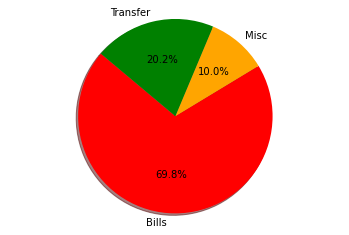

In [242]:
labels = ["Bills", "Misc", "Transfer"]
amount_In_Bag = [total_Bills, total_Misc, total_Transfer]
colors = ["red", "orange", "green",]
plt.pie(amount_In_Bag, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140, colors = colors)
plt.axis('equal')
plt.show()

My finding tell me I spend 69.8% off my wages on bills last year so this year i need to find away to brill that down so i can start to save money. 